### ライブラリ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

### JRD

- 係数の設定

In [12]:
# 各係数の設定
a0 = 19.9   # 定数項
a1 = 0.003   # 正極
a2 = 0.002   # 負極

In [13]:
# 各変数の平均を設定
mean_x = [0, 0]  # X1, X2

# 共分散行列を設定
cov_matrix_x = [
    [1.0, 0.0],  # x1 とその他の相関
    [0.0, 1.0],  # x2 とその他の相関
]

- モンテカルロシミュレーション

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean: 0.00000
std: 0.00360


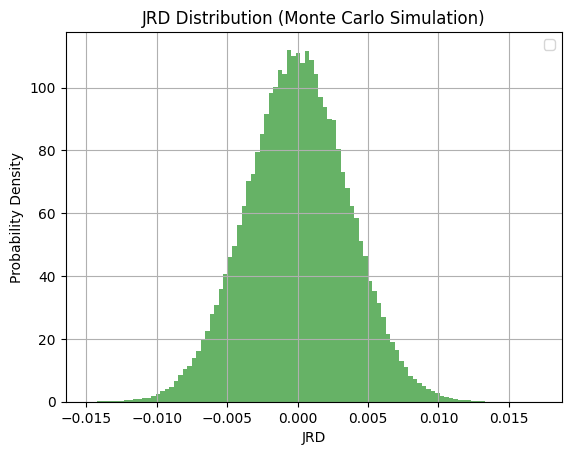

In [16]:
# シミュレーションの設定
n_samples = 100000  # サンプル数

# 多変量正規分布に従う変数を生成
x_samples = np.random.multivariate_normal(mean_x, cov_matrix_x, n_samples)

# JRDを計算
z1_samples = (
    a1 * x_samples[:, 0] + 
    a2 * x_samples[:, 1]
)

# 応力 y の確率密度関数をプロット
plt.hist(z1_samples, bins=100, density=True, alpha=0.6, color='g')

# 理論的な正規分布と比較
mean_z1 = np.mean(z1_samples)
std_z1 = np.std(z1_samples)
print('mean: {:.5f}'.format(mean_z1))
print('std: {:.5f}'.format(std_z1))

plt.title('JRD Distribution (Monte Carlo Simulation)')
plt.xlabel('JRD')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

- JRDを集計

### 応力

- 係数の設定

In [19]:
# 各係数の設定
b0 = 19.9   # 定数項
b1 = 0.003   # 正極
b2 = 0.002   # 負極
b3 = 0.001   # 隙間1
b4 = 0.0005  # 隙間2
b5 = 0.0001  # 位相差
b6 = 0.0002  # 膨化率

In [20]:
# 各変数の平均を設定
mean_y = [0, 0, 0, 0, 0, 0]  # Y1, Y2, Y3, Y4, Y5, Y6

# 共分散行列を設定
cov_matrix_y = [
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # x1 とその他の相関
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],  # x2 とその他の相関
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],  # x3 とその他の相関
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],  # x4 とその他の相関
    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # x5 とその他の相関
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   # x6 とその他の相関
]

- モンテカルロシミュレーション

In [ ]:
# シミュレーションの設定
n_samples = 100000  # サンプル数

# 多変量正規分布に従う変数を生成
y_samples = np.random.multivariate_normal(mean_y, cov_matrix_y, n_samples)

# 応力を計算
z2_samples = (
    b1 * x_samples[:, 0] + 
    b2 * x_samples[:, 1] + 
    b3 * x_samples[:, 2] + 
    b4 * x_samples[:, 3] + 
    b5 * x_samples[:, 4] +
    b6 * x_samples[:, 5] +
    f * x_samples[:, 0] * x_samples[:, 1] + 
    g * x_samples[:, 1] * x_samples[:, 2] +
    z
)

# 応力 y の確率密度関数をプロット
plt.hist(z2_samples, bins=100, density=True, alpha=0.6, color='g')

# 理論的な正規分布と比較
mean_z2 = np.mean(z2_samples)
std_z2 = np.std(z2_samples)
print('mean: {:.5f}'.format(mean_z2))
print('std: {:.5f}'.format(std_z2))

plt.title('Stress Distribution (Monte Carlo Simulation)')
plt.xlabel('stress')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### MCMC

In [2]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# サンプル数
n_samples = 1000

# 各係数の設定
a, b, c, d, e, f, g = 1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0
z = 0.0  # 定数項

# 各変数 x1 ~ x5 の平均を設定
mean_x = [0, 0, 0, 0, 0]

# 共分散行列を設定
cov_matrix = np.array([
    [1.0, 0.8, 0.2, 0.1, 0.3],
    [0.8, 1.0, 0.5, 0.2, 0.4],
    [0.2, 0.5, 1.0, 0.3, 0.1],
    [0.1, 0.2, 0.3, 1.0, 0.7],
    [0.3, 0.4, 0.1, 0.7, 1.0]
])

# MCMCモデリング
with pm.Model() as model:
    # 多変量正規分布に従う説明変数を設定
    x = pm.MvNormal('x', mu=mean_x, cov=cov_matrix, shape=(n_samples, 5))
    
    # 応力 y の計算（非線形関数）
    y = (a * x[:, 0] + 
         b * x[:, 1] + 
         c * x[:, 2] + 
         d * x[:, 3] + 
         e * x[:, 4] +
         f * x[:, 0] * x[:, 1] + 
         g * x[:, 1] * x[:, 2] + 
         z)
    
    # y の観測データを設定（正規分布に従うと仮定）
    y_obs = pm.Normal('y_obs', mu=y, sigma=1, observed=np.random.normal(loc=0, scale=1, size=n_samples))

    # MCMCサンプリングを実行
    trace = pm.sample(2000, chains=2, tune=1000, return_inferencedata=True)

# トレースプロットを表示
pm.plot_trace(trace)
plt.show()

# y の事後分布をプロット
plt.hist(trace.posterior['y_obs'].values.flatten(), bins=100, density=True, alpha=0.6, color='g')
plt.title('Posterior Distribution of Stress (y)')
plt.xlabel('Stress (y)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

KeyboardInterrupt: 